In [1]:
from pkfire.pkfire import Pkfire, XPkfire
import pkfire.dist_lib.dist as dlib
from pkfire.grid_lib.grid import Grid
from pkfire.ptl_lib.particle import Particles
from pkfire.movie_lib.point_sequence import SequenceMovie
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.rcParams['figure.max_open_warning'] = False
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

outpath = '/Users/cosinga/code/hcolor/fig_md_analysis/pres_movies/basic'

In [2]:
box = 75
mid = box/2
pos = np.ones((4, 3)) * mid
pos[1, 0] += 5
pos[2, 0] += -5
grid = Grid([100, 100, 100], box)
ptllist = Particles(pos)
movie = SequenceMovie(Pkfire(grid, ptllist), 1.5, outpath, darkmode=True)


In [3]:
movie.run()


Computing power spectrum of the field...
Time to complete loop = 8.27
Time taken = 8.29 seconds

Computing correlation function of the field...
Time to complete loop = 5.97
Time taken = 10.35 seconds

Computing power spectrum of the field...
Time to complete loop = 8.13
Time taken = 8.14 seconds

Computing correlation function of the field...
Time to complete loop = 6.55
Time taken = 10.84 seconds

Computing power spectrum of the field...
Time to complete loop = 8.74
Time taken = 8.75 seconds

Computing correlation function of the field...
Time to complete loop = 5.93
Time taken = 10.60 seconds


<Figure size 935.55x216 with 0 Axes>

<Figure size 935.55x216 with 0 Axes>

<Figure size 935.55x216 with 0 Axes>

In [2]:
# making bias comparison
grid1 = Grid([100, 100, 100], 100)
grid2 = Grid([100, 100, 100], 100)
grid3 = Grid([100, 100, 100], 100)

ptllist = dlib.random_linear(grid1, 100, [1, 1])
fullpkf = Pkfire(grid1, ptllist)

halfmass = Particles(ptllist.pos, ptllist.mass * 0.5)
halfpkf = Pkfire(grid2, halfmass)

randmass = dlib.random_linear(grid1, 100, [0, 1])
randpkf = Pkfire(grid3, Particles(ptllist.pos, randmass.mass))

fullpkf.gridPtls(); halfpkf.gridPtls(); randpkf.gridPtls()
fullpkf.pk(); halfpkf.pk(); randpkf.pk()

xpkrand = XPkfire(fullpkf, randpkf)
xpkrand.pk()





Computing power spectrum of the field...
Time to complete loop = 7.79
Time taken = 7.81 seconds

Computing power spectrum of the field...
Time to complete loop = 7.52
Time taken = 7.54 seconds

Computing power spectrum of the field...
Time to complete loop = 7.81
Time taken = 7.82 seconds

Computing power spectra of the fields...
Time FFTS = 0.02
Time loop = 13.06
Time taken = 13.09 seconds


[None]

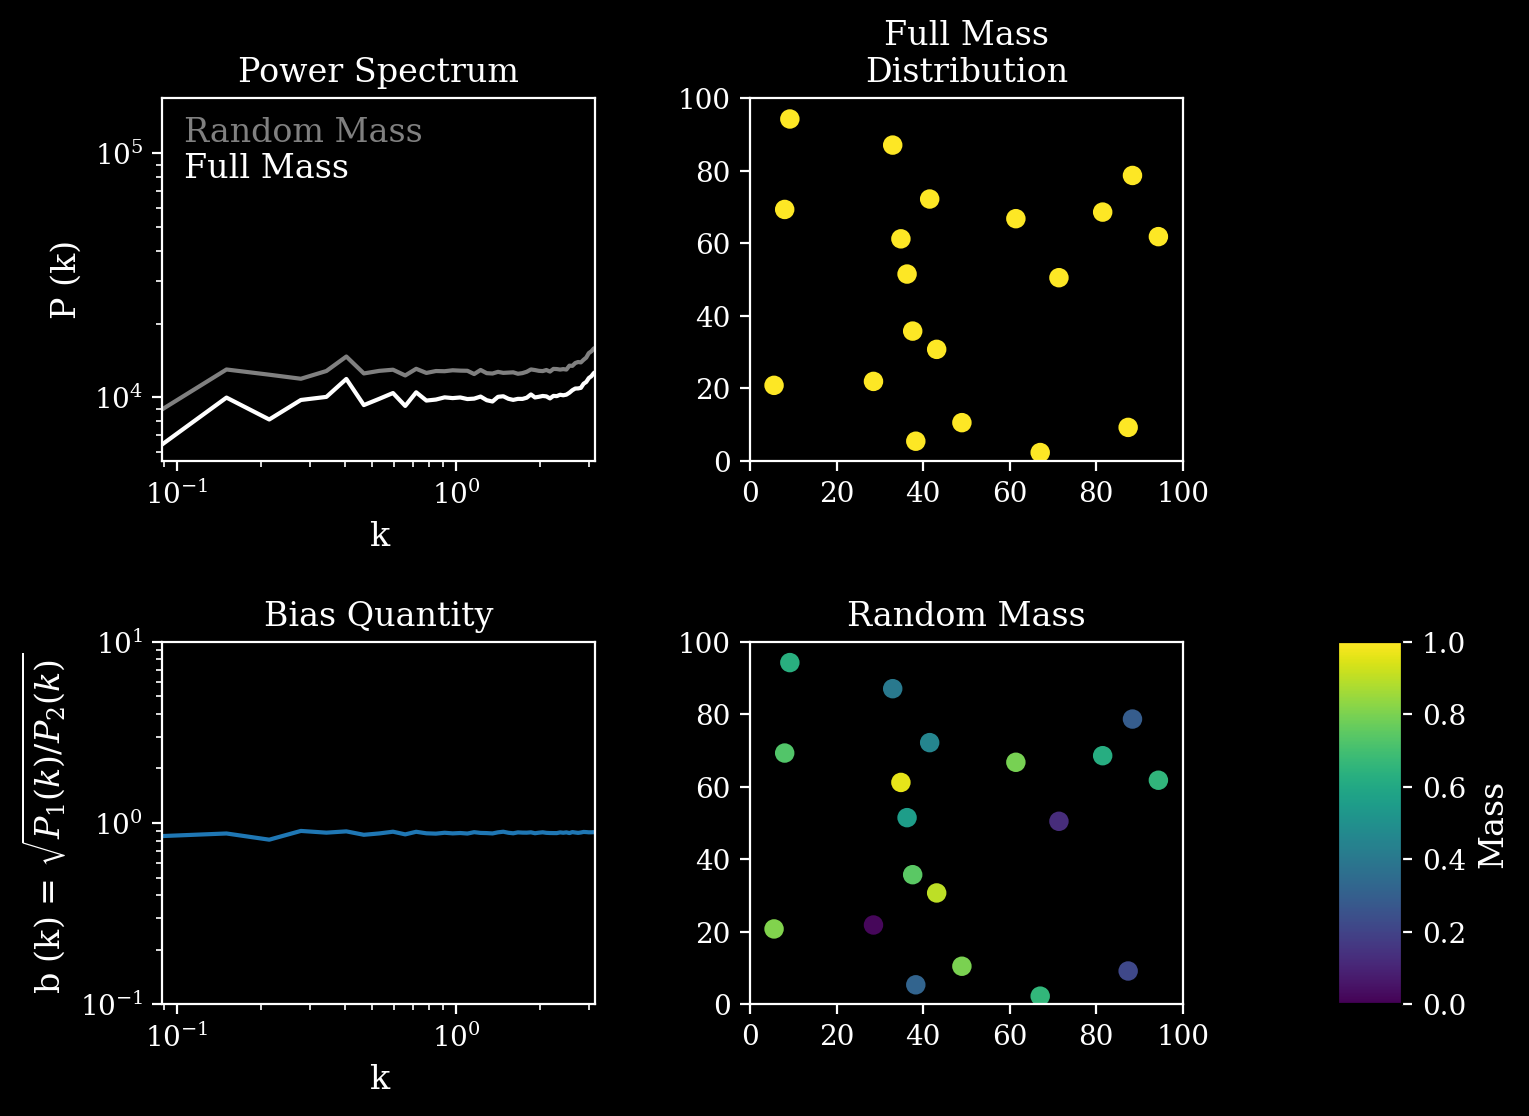

In [6]:
fig, axes = plt.subplots(2, 3, gridspec_kw = {'width_ratios':[1, 1, 0.15], 'wspace':0.5, 'hspace':0.5}, figsize = (8, 6), dpi = 200)
norm = mpl.colors.Normalize(0, 1)

fullpkf.ptlPlot(axes[0, 1], cax = 'skip', slc = slice(40, 60), norm = norm)
randpkf.ptlPlot(axes[1, 1], cax = 'skip', slc = slice(40, 60), norm = norm)
smap = mpl.cm.ScalarMappable(norm = norm, cmap = 'viridis')
fig.colorbar(smap, cax = axes[1, 2])

randpkf.pkPlot(axes[0, 0], color = 'gray')
fullpkf.pkPlot(axes[0, 0], color = 'white')

axes[0, 0].text(0.05, 0.95, 'Random Mass', color = 'gray', va = 'top', ha = 'left', fontsize = 12,
        transform = axes[0, 0].transAxes)
axes[0, 0].text(0.05, 0.85, 'Full Mass', color = 'white', va = 'top', ha = 'left', fontsize = 12,
        transform = axes[0, 0].transAxes )

xpkrand.obsbiasPlot(axes[1, 0])

ax = axes[0, 0]
ax.set_xlabel('k', fontsize = 12)
ax.set_ylabel('P (k)', fontsize = 12)
ax.set_title('Power Spectrum', fontsize = 12)

ax = axes[1, 0]
ax.set_xlabel('k', fontsize = 12)
ax.set_ylabel('b (k) = $\\sqrt{P_1 (k) / P_2 (k)}$', fontsize = 12)
ax.set_title('Bias Quantity', fontsize = 12)
ax.set_ylim(.1, 10)

ax = axes[0, 1]
ax.set_title('Full Mass\nDistribution', fontsize = 12)

ax = axes[1, 1]
ax.set_title('Random Mass', fontsize = 12)

ax = axes[1, 2]
ax.set_ylabel('Mass', fontsize = 12)
SequenceMovie._darkmode(fig, axes)

axes[0, 2].set(visible = False)



In [10]:
fig.savefig(outpath + '_pk_plot.png', bbox_inches = 'tight', dpi = 200)